In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
#Load the dataset
data = pd.read_csv('/content/green_tech_data.csv')

In [22]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [23]:
null_values = data.isnull().sum()
print(null_values)

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


sustainability
0    85
1    15
Name: count, dtype: int64


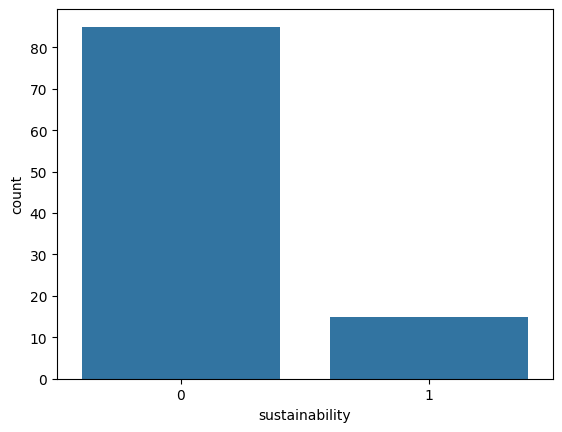

In [24]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

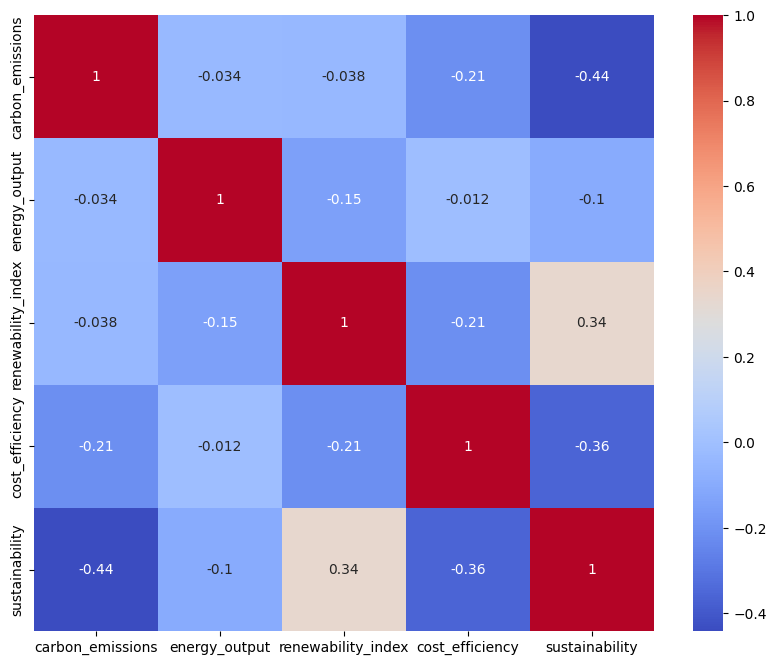

In [25]:
#prompt: generate the heatmap

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()
#

In [26]:
X = data[['carbon_emissions', 'renewability_index', 'cost_efficiency']]
y = data['sustainability']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# prompt: finding the accuracy

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.95
[[33  0]
 [ 2  5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.71      0.83         7

    accuracy                           0.95        40
   macro avg       0.97      0.86      0.90        40
weighted avg       0.95      0.95      0.95        40



In [36]:
print(classification_report(y_test, y_pred, target_names=['Not sustainable', 'sustainable']))

                 precision    recall  f1-score   support

Not sustainable       0.94      1.00      0.97        33
    sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [37]:
coefficients = pd.DataFrame(model.coef_.T, index=X.columns, columns=['coefficient'])
print(coefficients)

                    coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [38]:
import joblib
joblib.dump(model, 'Irmodel_Sustainable.pkl')

['Irmodel_Sustainable.pkl']

In [39]:
import joblib
joblib.dump(model, 'Irmodel_Sustainable.pkl')

['Irmodel_Sustainable.pkl']

In [40]:
model = joblib.load('Irmodel_Sustainable.pkl')

In [41]:
new_data = pd.DataFrame({
    'carbon_emissions': [10],
    'renewability_index': [0.8],
    'cost_efficiency': [0.7]
})

predictions = model.predict(new_data)
print(f"Prediction: {predictions[0]}")

probabilities = model.predict_proba(new_data)
print(f"Probabilities: {probabilities}")

Prediction: 1
Probabilities: [[0.03571767 0.96428233]]
